# Machine Learning Assignment 2
Vasiliki Strouthopoulou 7115152200014

Panagiotis Xiropotamos 7115152200038

Marina Thalassini Filippidou 7115152200022

# Exercise 2Α,2Β

In [ ]:
from keras.datasets import mnist


import numpy as np
import pandas as pd

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten


import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# Load MNIST Data into (x_train, y_train), (x_test, y_test)
(x_train, y_train), (x_test, y_test) = mnist.load_data()



In [ ]:
# Print the shapes of the Train and Test data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
for i in range(5):
    print(y_train[i])

5
0
4
1
9


In [ ]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


We observe that the dataframe consists of 1 channel and the pixels have values form 0 to 255

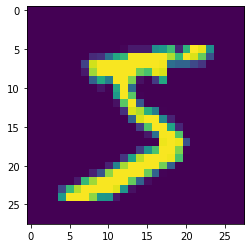

In [ ]:
#visualize an image

%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

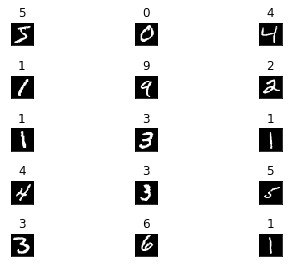

In [ ]:
# Create a plot figure of training set
fig = plt.figure()

# Display the first 15 training images, along with their labels
for i in range(15):
    plt.subplot(5,3,i+1)
    plt.tight_layout()
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title(y_train[i])
    plt.xticks([])
    plt.yticks([])

# Show the figure
plt.show()

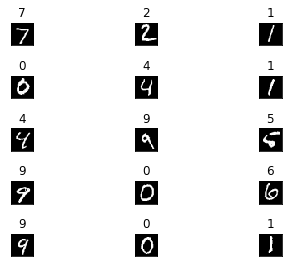

In [ ]:
# Create a plot figure of test set
fig = plt.figure()

# Display the first 15 training images, along with their labels
for i in range(15):
    plt.subplot(5,3,i+1)
    plt.tight_layout()
    plt.imshow(x_test[i], cmap='gray', interpolation='none')
    plt.title(y_test[i])
    plt.xticks([])
    plt.yticks([])

# Show the figure
plt.show()

In [ ]:
# convert to one hot encoding
from keras.utils import to_categorical
y_train= to_categorical(y_train, num_classes=10, dtype="uint8")
y_test = to_categorical(y_test, num_classes=10, dtype="uint8")


In [ ]:
#print y_train or y_test to see the one hot encoding result
for i in range(5):
    print(y_test[i])

[0 0 0 0 0 0 0 1 0 0]
[0 0 1 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0]


In [ ]:
print(x_train.shape, x_test.shape, y_train.shape)

(60000, 28, 28) (10000, 28, 28) (60000, 10)


# Compile and train the model


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


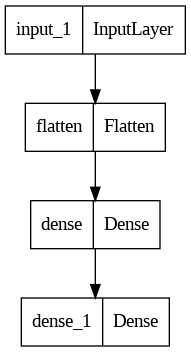

In [ ]:
import keras.layers as l
import keras.models as m
import keras.optimizers as o

Input=l.Input(shape=(28,28,1))
hidden1=l.Flatten()(Input)
hidden2=l.Dense(64, activation="relu")(hidden1)
output=l.Dense(10,activation='softmax')(hidden2)

model=m.Model(Input,output)
model.summary()
model.compile(loss='categorical_crossentropy',optimizer=o.Adam(),metrics=['accuracy'])

keras.utils.plot_model(model, "my_first_model.png")



In [ ]:
history=model.fit(x_train,y_train, batch_size=32, epochs=12, validation_data=(x_test,y_test))


test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/12
1875/1875 [==============================] - 8s 4ms/step - loss: 2.2145 - accuracy: 0.7721 - val_loss: 0.7010 - val_accuracy: 0.8468
Epoch 2/12
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5257 - accuracy: 0.8802 - val_loss: 0.4342 - val_accuracy: 0.9039
Epoch 3/12
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3475 - accuracy: 0.9140 - val_loss: 0.3354 - val_accuracy: 0.9253
Epoch 4/12
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2879 - accuracy: 0.9267 - val_loss: 0.2794 - val_accuracy: 0.9314
Epoch 5/12
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2610 - accuracy: 0.9333 - val_loss: 0.2643 - val_accuracy: 0.9307
Epoch 6/12
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2384 - accuracy: 0.9388 - val_loss: 0.2652 - val_accuracy: 0.9392
Epoch 7/12
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2271 - accuracy: 0.9412 - val_loss: 0.3996 - val_accuracy:

# Evaluate the model


In [ ]:
def predict(x,predictor):
  activations=predictor.predict(x.reshape(1,28,28,1))
  prediction=np.argmax(activations)

  plt.bar(range(10),activations[0])
  plt.show()
  plt.imshow(x.reshape(28,28),cmap='Greys')
  plt.show

1/1 [==============================] - 0s 62ms/step


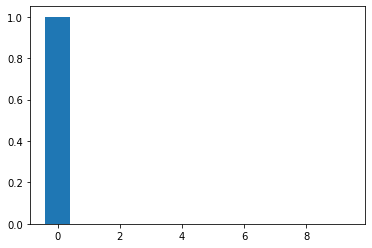

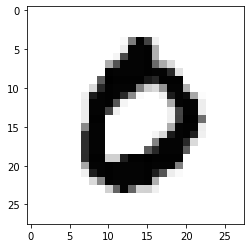

In [ ]:
#making a prediction
predict(x_test[3],model)

we see that our model predicted the correct value 0 with 100% certainty

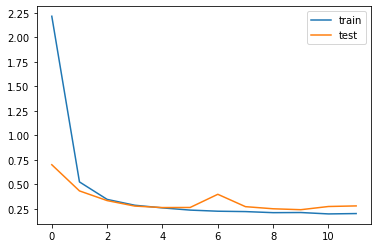

In [ ]:
from matplotlib import pyplot as plot


# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
#Evaluate model performance
train_loss, train_acc = model.evaluate(x_train, y_train)
print('Test Accuracy: ', train_acc, '\nTest Loss: ', train_loss)

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Accuracy: ', test_acc, '\nTest Loss: ', test_loss)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2034 - accuracy: 0.9457
Test Accuracy:  0.9456666707992554 
Test Loss:  0.2034142017364502
313/313 [==============================] - 1s 2ms/step - loss: 0.2811 - accuracy: 0.9342
Test Accuracy:  0.9341999888420105 
Test Loss:  0.2811044454574585


In [ ]:
# Predict the class names (labels) in test data
y_pred_probas = model.predict(x_test)
y_pred = np.argmax(y_pred_probas, axis=-1)
y_pred = tf.keras.utils.to_categorical(y_pred, num_classes=10, dtype="int32")

# Print evaluation report
print(classification_report(y_test,y_pred))

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.94      0.92      0.93      1032
           3       0.93      0.93      0.93      1010
           4       0.98      0.87      0.92       982
           5       0.92      0.94      0.93       892
           6       0.98      0.92      0.95       958
           7       0.98      0.91      0.94      1028
           8       0.80      0.94      0.87       974
           9       0.89      0.93      0.91      1009

   micro avg       0.93      0.93      0.93     10000
   macro avg       0.94      0.93      0.93     10000
weighted avg       0.94      0.93      0.93     10000
 samples avg       0.93      0.93      0.93     10000



Here we can seet that the digits predicted with more precission are 1,4,6 and 7

In [ ]:
class_names=['0','1','2','3','4','5','6','7','8','9']

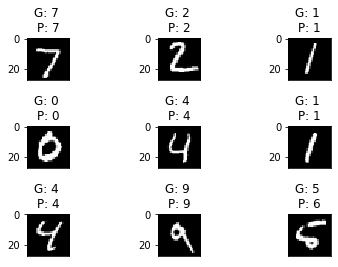

In [ ]:
# Create a figure with the ground truth labels of the images (G) and the predicted labels from the model (P)
offset = 0
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(x_test[i+offset], cmap='gray', interpolation='none')
    plt.title(f"G: {class_names[np.argmax(y_test[i+offset])]} \nP: {class_names[np.argmax(y_pred[i+offset])]}")
    plt.xticks([])

plt.yticks([])
plt.show()

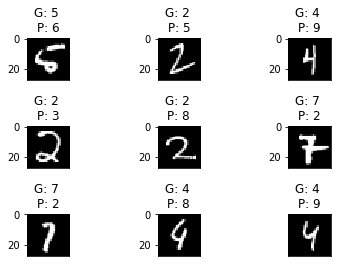

In [ ]:
# Find the ids that the model made a mistake
mistake_ids = [i for i in range(len(y_test)) if np.argmax(y_test[i])!=np.argmax(y_pred[i])]

# Create a figure for the first 9 mistakes
fig = plt.figure()
for m_i, m_idx in enumerate(mistake_ids[:9]):
    plt.subplot(3,3,m_i+1)
    plt.tight_layout()
    plt.imshow(x_test[m_idx], cmap='gray', interpolation='none')
    plt.title(f"G: {class_names[np.argmax(y_test[m_idx])]} \nP: {class_names[np.argmax(y_pred[m_idx])]}")
    plt.xticks([])

plt.yticks([])
plt.show()

# Visualize the certainty of our model to its predictions


In [ ]:
# Function that visualizes the predictions of our model using bars
def plot_value_array(predictions_array, true_labels_array):
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    true_label = np.argmax(true_labels_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [ ]:
# Function that visualizes the test image, with a percentage of the correct class
def plot_image(predictions_array, true_labels_array, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    true_label = np.argmax(true_labels_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color=color)

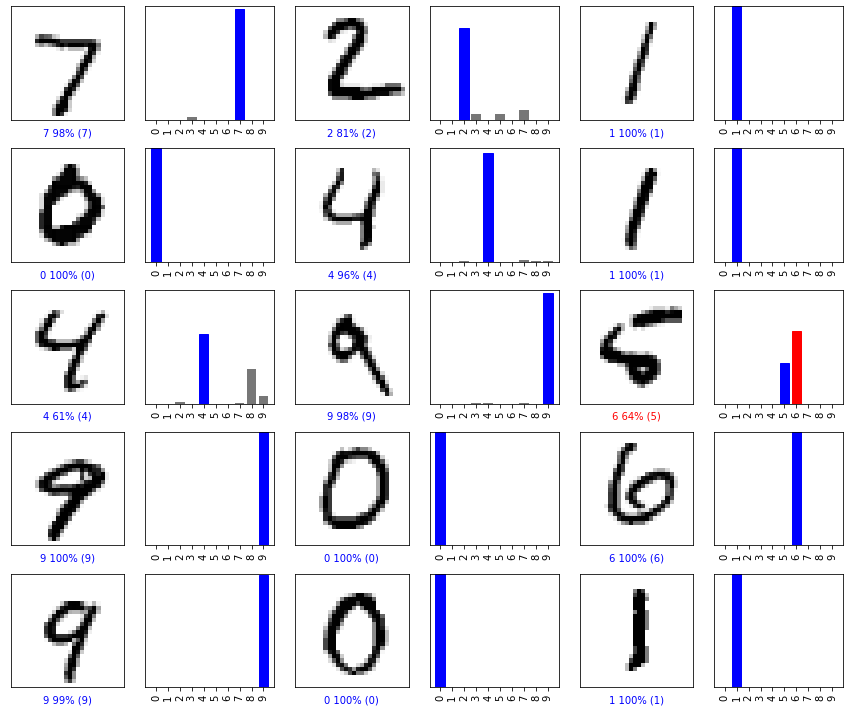

In [ ]:
# Use the above function to perform the visualization

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
fig = plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(y_pred_probas[i], y_test[i], x_test[i])
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(y_pred_probas[i+offset], y_test[i+offset])
  _ = plt.xticks(range(10), class_names, rotation=90)

plt.tight_layout()
plt.show()

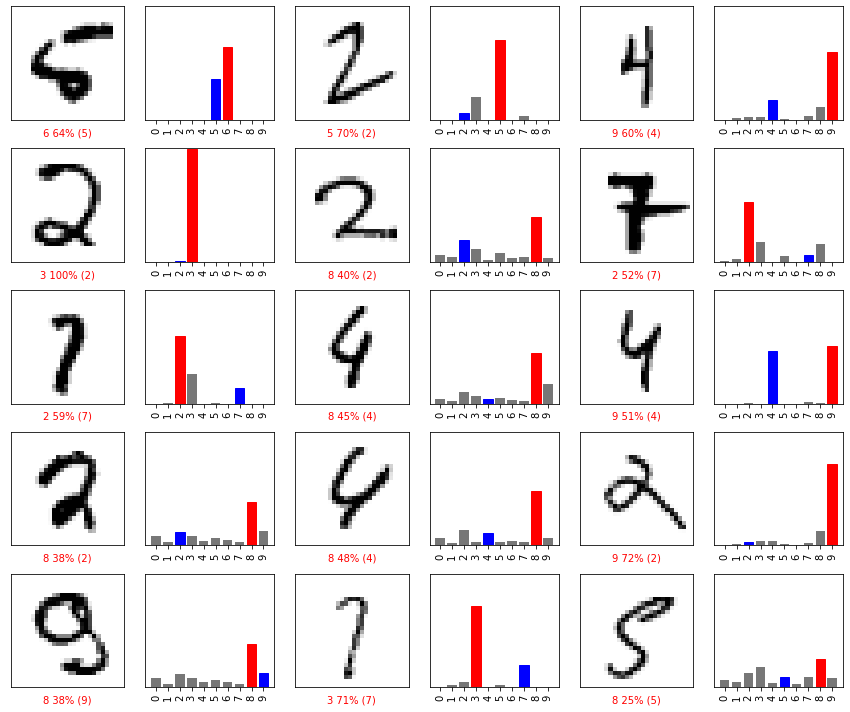

In [ ]:
# We can also do this on the model's mistakes
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
fig = plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for m_i, m_idx in enumerate(mistake_ids[:num_images]):
  plt.subplot(num_rows, 2*num_cols, 2*m_i+1)
  plot_image(y_pred_probas[m_idx], y_test[m_idx], x_test[m_idx])
  plt.subplot(num_rows, 2*num_cols, 2*m_i+2)
  plot_value_array(y_pred_probas[m_idx], y_test[m_idx])
  _ = plt.xticks(range(10), class_names, rotation=90)

plt.tight_layout()
plt.show()

In [ ]:
# Function that plots a heatmap / confusion matrix
def plot_heatmap(y_true, y_pred, class_names, ax, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(
        cm,
        annot=True,
        square=True,
        xticklabels=class_names,
        yticklabels=class_names,
        fmt='d',
        cmap=plt.cm.Blues,
        cbar=False,
        ax=ax
    )
    ax.set_title(title, fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_ylabel('True Label', fontsize=12)
    ax.set_xlabel('Predicted Label', fontsize=12)

In [ ]:
print(y_test.argmax(axis=1).shape, y_pred.argmax(axis=1).shape)

(10000,) (10000,)


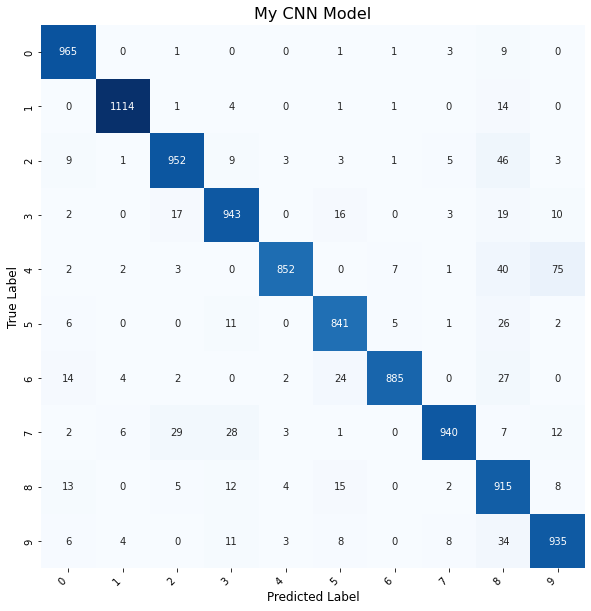

In [ ]:
# Plot the heatmap / confusion matrix for the test set
fig, ax1 = plt.subplots(1, 1, figsize=(10, 10))

plot_heatmap(y_test.argmax(axis=1), y_pred.argmax(axis=1), class_names, ax1, title="My CNN Model")

 Βased on the heatmap we can select our top five digits based on the percentage of false predictions 0:5.2%, 1:1.5%, 2:5.7%, 3:7.3%, 4:1.6%, 5:7.6%, 6:1.7%, 7:2.4%, 8:19.5%, 9:9.8%
We select digits 1,4 and 6

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
PATH = F"/content/gdrive/My Drive/{model}/{model}"

In [ ]:
model.save('my_model')

In [ ]:
loaded= keras.models.load_model("my_model")


# Construct an adversarial example

---




In [ ]:
import tensorflow as tf
model.trainable=False

input=keras.Input(shape=(1,))
hidden=layers.Dense(256, activation="relu")(input)
hidden=layers.Dense(28*28,activation="sigmoid")(hidden)
output=layers.Reshape((28,28))(hidden)

adversarial_model=keras.Model(input,output)

adversarial_model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=[tf.keras.metrics.RootMeanSquaredError()])

composite=keras.Model(input,model(output))
composite.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=["accuracy"])

adversarial_model.summary()
composite.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_2 (Dense)             (None, 256)               512       
                                                                 
 dense_3 (Dense)             (None, 784)               201488    
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 202,000
Trainable params: 202,000
Non-trainable params: 0
_________________________________________________________________
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,

In [ ]:
from tqdm import tqdm

for _ in tqdm(range(100)):


  adversarial_model.train_on_batch([np.array([1])],np.array([x_test[3]]))
  composite.train_on_batch([np.array([1])],np.array([[0,0,0,0,0,0,0,0,1,0]]))


100%|██████████| 100/100 [00:04<00:00, 20.98it/s]


1/1 [==============================] - 0s 98ms/step


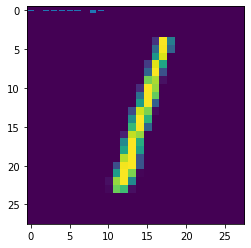

1/1 [==============================] - 0s 37ms/step


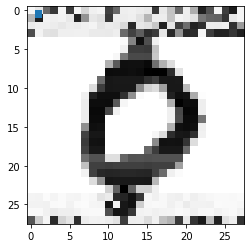

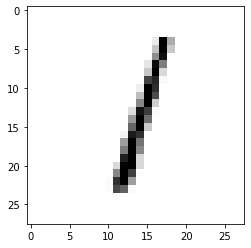

In [ ]:
advImage=adversarial_model.predict([np.array([1])]).reshape(1,28,28,1)
plt.imshow(x_test[2])
predict(advImage,model)
predict(x_test[2],model)

1/1 [==============================] - 0s 44ms/step


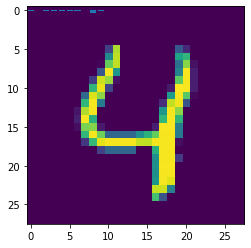

1/1 [==============================] - 0s 33ms/step


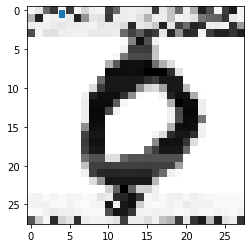

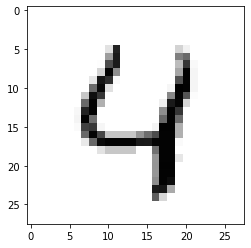

In [ ]:
advImage=adversarial_model.predict([np.array([1])]).reshape(1,28,28,1)
plt.imshow(x_test[4])
predict(advImage,model)
predict(x_test[4],model)

1/1 [==============================] - 0s 39ms/step


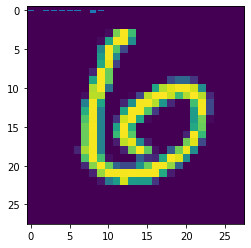

1/1 [==============================] - 0s 33ms/step


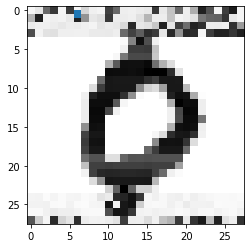

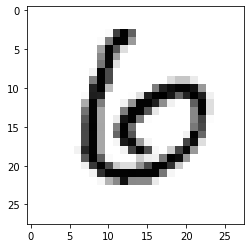

In [ ]:
advImage=adversarial_model.predict([np.array([1])]).reshape(1,28,28,1)
plt.imshow(x_test[11])
predict(advImage,model)
predict(x_test[11],model)